# Classificação

Atributos: age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import LabelBinarizer
from scipy import interp
from itertools import cycle
from sklearn import metrics

In [2]:
dataset = pd.read_csv('heart_treino.csv')

In [3]:
#Nomeando colunas
data = pd.DataFrame(dataset)
data.columns =["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","Class"]

In [4]:
#Preenchendo valores nulos
data['age'].fillna(data['age'].mean(), inplace=True)
data['trestbps'].fillna(data['trestbps'].mean(), inplace=True)
data['restecg'].fillna(data['restecg'].mean(), inplace=True)
data['exang'].fillna(data['exang'].mean(), inplace=True)
data['sex'].fillna(data['sex'].mean(), inplace=True)

# Estatísticas: (Contagem de dados, média, desvio padrão, mínimo, 25%, 50%, 75% e máximo):

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,53.377451,0.626866,1.169082,129.941176,243.338164,0.130435,0.529126,155.285024,0.213592,0.814010,1.507246,0.512077,2.236715,0.792271
std,9.200553,0.477732,0.992893,16.294215,52.016070,0.337598,0.508783,20.419173,0.409842,1.018826,0.614308,0.923585,0.536986,0.406666
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.500000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,143.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,54.000000,1.000000,1.000000,130.000000,236.000000,0.000000,1.000000,159.000000,0.000000,0.400000,2.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.500000,0.000000,1.000000,170.000000,0.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#correlação
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
age,1.000000,-0.133222,-0.048268,0.287849,0.276845,0.145637,-0.111509,-0.459598,0.129425,0.234589,-0.163730,0.227791,0.126022,-0.177938
sex,-0.133222,1.000000,-0.044144,-0.000936,-0.210816,0.122641,-0.024971,0.074274,0.185889,0.076811,-0.005184,0.085881,0.263225,-0.257327
cp,-0.048268,-0.044144,1.000000,0.125175,-0.049613,0.194564,0.076409,0.232021,-0.258738,-0.063297,0.049713,-0.094876,-0.148271,0.387971
trestbps,0.287849,-0.000936,0.125175,1.000000,0.127580,0.122300,-0.127943,-0.054443,0.035858,0.240016,-0.092572,0.072331,0.030449,-0.075112
chol,0.276845,-0.210816,-0.049613,0.127580,1.000000,-0.019110,-0.158450,0.001189,0.054380,-0.012996,0.040637,-0.032723,0.027708,-0.039577
fbs,0.145637,0.122641,0.194564,0.122300,-0.019110,1.000000,-0.008094,0.029086,0.008175,-0.058970,0.007124,0.064983,0.069854,0.021523
restecg,-0.111509,-0.024971,0.076409,-0.127943,-0.158450,-0.008094,1.000000,0.120840,-0.159828,-0.228716,0.193239,-0.005767,-0.007073,0.263320
thalach,-0.459598,0.074274,0.232021,-0.054443,0.001189,0.029086,0.120840,1.000000,-0.338967,-0.273974,0.288728,-0.160676,-0.130588,0.309987
exang,0.129425,0.185889,-0.258738,0.035858,0.054380,0.008175,-0.159828,-0.338967,1.000000,0.193414,-0.162485,0.081554,0.237063,-0.350359
oldpeak,0.234589,0.076811,-0.063297,0.240016,-0.012996,-0.058970,-0.228716,-0.273974,0.193414,1.000000,-0.559770,0.162582,0.292928,-0.463942


# Visualização:

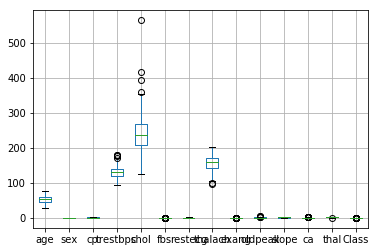

In [7]:
#boxplot
boxplot = data.boxplot()

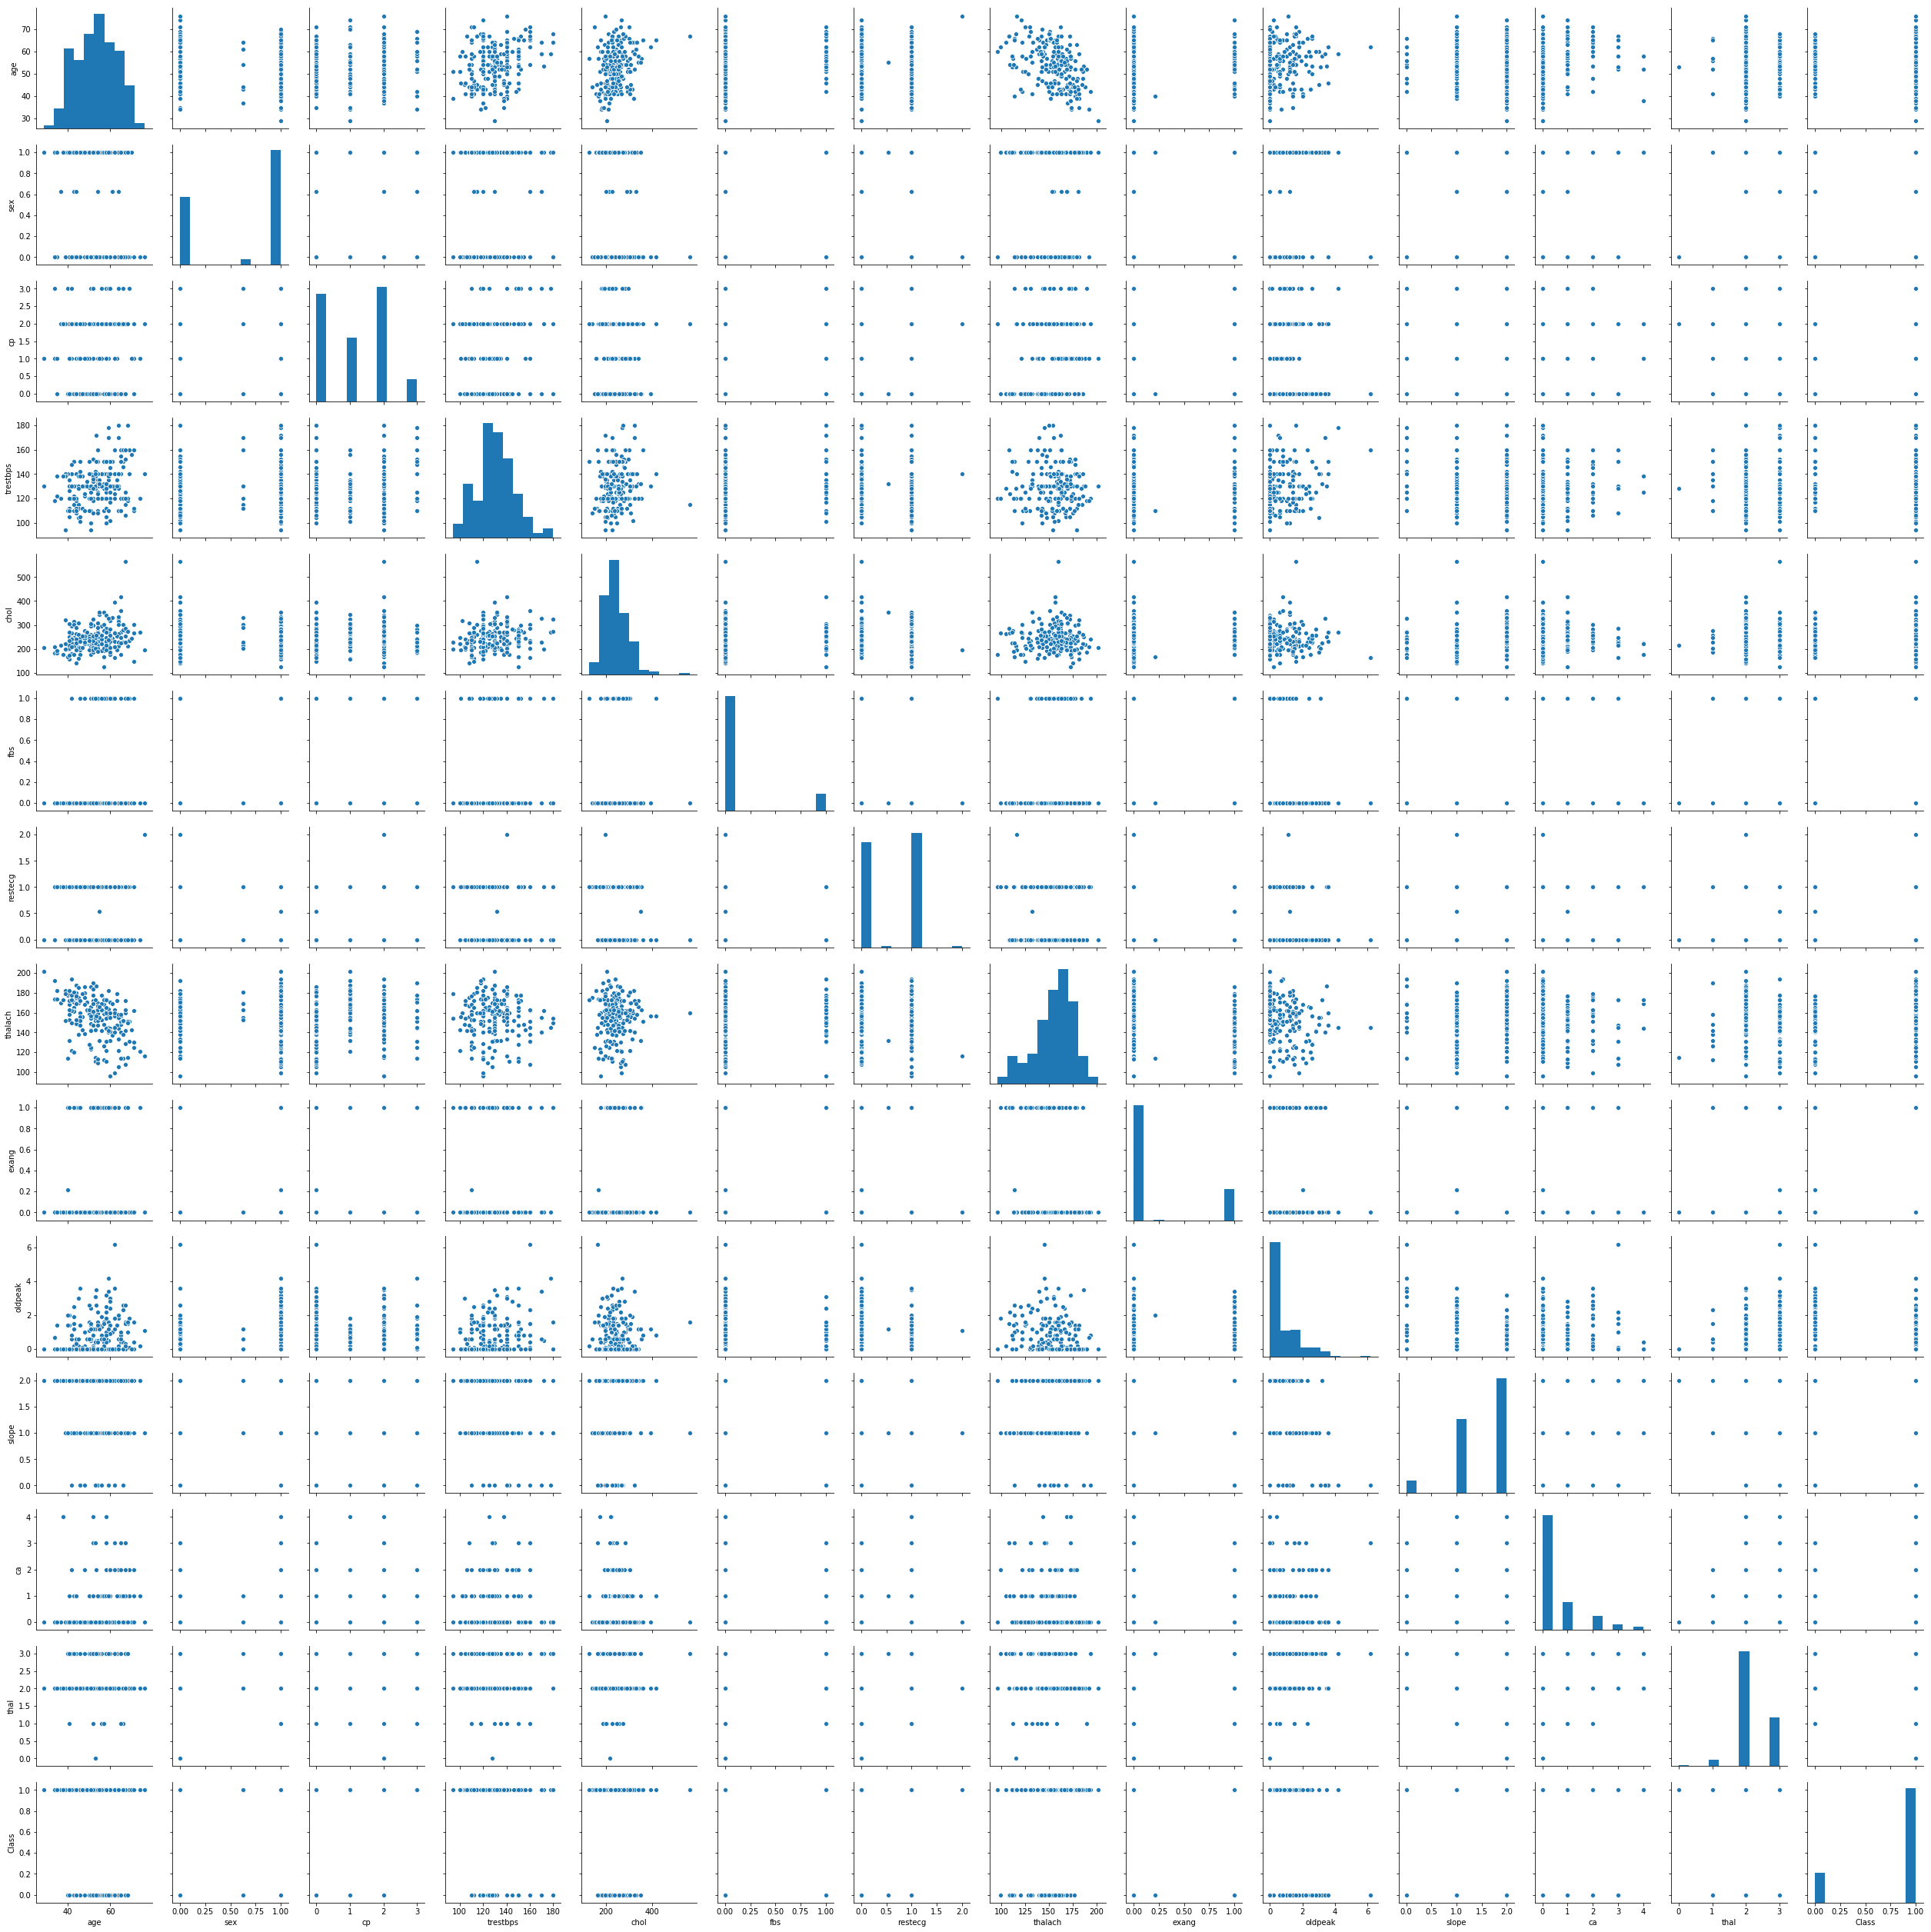

In [8]:
#correlograma
sns.pairplot(data)
plt.show()

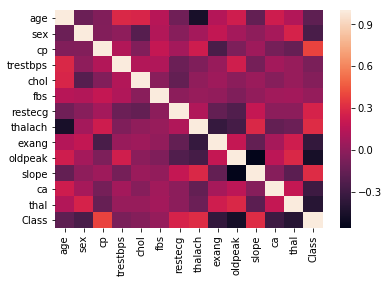

In [9]:
#Correlação:
sns.heatmap(data.corr())

# Classificação:

In [10]:
# Organizando vetores para data e classes: X - features, y - labels
n_classes=2
X = np.array(data.drop(['Class'], axis=1))
y = np.array(data['Class'])

In [11]:
# Dividindo os dados em um conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# C-Support Vector Classification
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    gammas = [0.1, 1]

    for gamma in gammas:
        cs = [0.1, 1]

        for c in cs:
            svc = SVC(kernel=kernel, gamma=gamma, C=c)
            model_svc = svc.fit(X_train, y_train)
            preds_svc = model_svc.predict(X_test)
            print("SVC: ",accuracy_score(y_test, preds_svc),"com",kernel,"kernel, com", gamma, "gamma e com",c,"c.")

SVC:  0.8260869565217391 com linear kernel, com 0.1 gamma e com 0.1 c.
SVC:  0.855072463768116 com linear kernel, com 0.1 gamma e com 1 c.
SVC:  0.8260869565217391 com linear kernel, com 1 gamma e com 0.1 c.
SVC:  0.855072463768116 com linear kernel, com 1 gamma e com 1 c.
SVC:  0.7681159420289855 com rbf kernel, com 0.1 gamma e com 0.1 c.
SVC:  0.7681159420289855 com rbf kernel, com 0.1 gamma e com 1 c.
SVC:  0.7681159420289855 com rbf kernel, com 1 gamma e com 0.1 c.
SVC:  0.7681159420289855 com rbf kernel, com 1 gamma e com 1 c.
SVC:  0.7536231884057971 com poly kernel, com 0.1 gamma e com 0.1 c.
SVC:  0.7536231884057971 com poly kernel, com 0.1 gamma e com 1 c.
SVC:  0.8260869565217391 com poly kernel, com 1 gamma e com 0.1 c.
SVC:  0.8260869565217391 com poly kernel, com 1 gamma e com 1 c.


In [13]:
# Testando o melhor valor de K para KNN
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    model_knn = knn.fit(X_train, y_train)
    preds_knn = model_knn.predict(X_test)
    print("K Neighbors Classifier: ",accuracy_score(y_test, preds_knn),"com",i,"vizinhos.")

K Neighbors Classifier:  0.7536231884057971 com 1 vizinhos.
K Neighbors Classifier:  0.6376811594202898 com 2 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 3 vizinhos.
K Neighbors Classifier:  0.7391304347826086 com 4 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 5 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 6 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 7 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 8 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 9 vizinhos.
K Neighbors Classifier:  0.782608695652174 com 10 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 11 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 12 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 13 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 14 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 15 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 16 vizinhos.
K Neighbors Classifier:  0.7536231

In [14]:
# Testando a melhores parâmetros da árvore de decisão
# Gini index
for i in range(1,6):
    dtc = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=i, min_samples_leaf=5)
    model_dtc = dtc.fit(X_train, y_train)
    preds_dtc = model_dtc.predict(X_test)
    print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc),"com",i,"profundidade.")

Decision Tree Classifier:  0.7681159420289855 com 1 profundidade.
Decision Tree Classifier:  0.782608695652174 com 2 profundidade.
Decision Tree Classifier:  0.782608695652174 com 3 profundidade.
Decision Tree Classifier:  0.8405797101449275 com 4 profundidade.
Decision Tree Classifier:  0.8405797101449275 com 5 profundidade.


In [15]:
# Gain information
for i in range(1,6):
    dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=i, min_samples_leaf=5)
    model_dtc = dtc.fit(X_train, y_train)
    preds_dtc = model_dtc.predict(X_test)
    print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc),"com",i,"profundidade.")

Decision Tree Classifier:  0.7536231884057971 com 1 profundidade.
Decision Tree Classifier:  0.782608695652174 com 2 profundidade.
Decision Tree Classifier:  0.8115942028985508 com 3 profundidade.
Decision Tree Classifier:  0.7971014492753623 com 4 profundidade.
Decision Tree Classifier:  0.7971014492753623 com 5 profundidade.


In [16]:
# Inicializando os classificadores
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC(kernel='linear',gamma=0.1,C=1)
knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
dtc = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=5)

In [17]:
# Treinar os classificadores
model_lr = lr.fit(X_train, y_train)
model_gnb = gnb.fit(X_train, y_train)
model_svc = svc.fit(X_train, y_train)
model_knn = knn.fit(X_train, y_train)
model_dtc = dtc.fit(X_train, y_train)

C:\Users\mathe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Fazer previsões para ter uma ideia do que o modelo determinou
preds_lr = model_lr.predict(X_test)
print("Logistic Regression: ",preds_lr)
preds_gnb = model_gnb.predict(X_test)
print("Gaussian: ",preds_gnb)
preds_svc = model_svc.predict(X_test)
print("SVC: ",preds_svc)
preds_knn = model_knn.predict(X_test)
print("K Neighbors Classifier: ",preds_knn)
preds_dtc = model_dtc.predict(X_test)
print("Decision Tree Classifier: ",preds_dtc)

Logistic Regression:  [1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
Gaussian:  [1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
SVC:  [1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
K Neighbors Classifier:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Decision Tree Classifier:  [1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


# Validações:

In [19]:
# Avaliar a acurácia
print("Logistic Regression: ",accuracy_score(y_test, preds_lr))
print("Gaussian: ",accuracy_score(y_test, preds_gnb))
print("SVC: ",accuracy_score(y_test, preds_svc))
print("K Neighbors Classifier: ",accuracy_score(y_test, preds_knn))
print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc))

Logistic Regression:  0.855072463768116
Gaussian:  0.8695652173913043
SVC:  0.855072463768116
K Neighbors Classifier:  0.782608695652174
Decision Tree Classifier:  0.8405797101449275


Logistic Regression: 


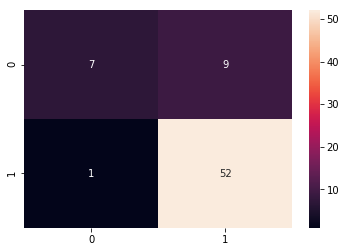

In [20]:
#Criando as matrizes de confusões
print("Logistic Regression: ")
cm_lr = confusion_matrix(y_test, preds_lr)
sns.heatmap(cm_lr, annot=True)

Gaussian: 


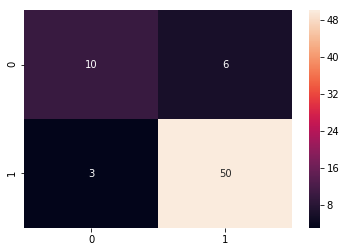

In [21]:
print("Gaussian: ")
cm_gnb = confusion_matrix(y_test, preds_gnb)
sns.heatmap(cm_gnb, annot=True)

SVC: 


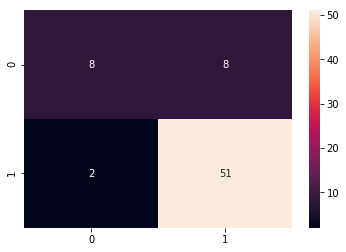

In [22]:
print("SVC: ")
cm_svc = confusion_matrix(y_test, preds_svc)
sns.heatmap(cm_svc, annot=True)

K Neighbors Classifier: 


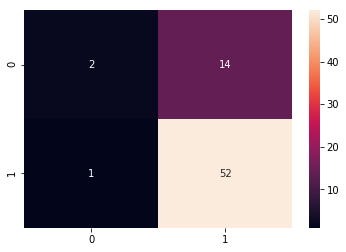

In [23]:
print("K Neighbors Classifier: ")
cm_knn = confusion_matrix(y_test, preds_knn)
sns.heatmap(cm_knn, annot=True)

Decision Tree Classifier: 


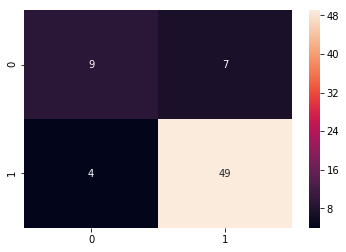

In [24]:
print("Decision Tree Classifier: ")
cm_dtc = confusion_matrix(y_test, preds_dtc)
sns.heatmap(cm_dtc, annot=True)

In [25]:
#Utilizando a matriz de confusão para medir a acurácia
acertos=0
for i in range (2): 
    acertos = acertos + cm_lr[i][i]
acur = acertos/len(y_test)
print("Logistic Regression: " ,acur)

acertos=0
for i in range (2): 
    acertos = acertos + cm_gnb[i][i]
acur = acertos/len(y_test)
print("Gaussian: " ,acur)

acertos=0
for i in range (2): 
    acertos = acertos + cm_svc[i][i]
acur = acertos/len(y_test)
print("SVC: " ,acur)

acertos=0
for i in range (2): 
    acertos = acertos + cm_knn[i][i]
acur = acertos/len(y_test)
print("K Neighbors Classifier: " ,acur)

acertos=0
for i in range (2): 
    acertos = acertos + cm_dtc[i][i]
acur = acertos/len(y_test)
print("Decision Tree Classifier: " ,acur)

Logistic Regression:  0.855072463768116
Gaussian:  0.8695652173913043
SVC:  0.855072463768116
K Neighbors Classifier:  0.782608695652174
Decision Tree Classifier:  0.8405797101449275


In [26]:
# Precisão, recall e f-measure (com micro, macro e weighted average)
print("Logistic Regression: ")
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, preds_lr, target_names=target_names))
print("Gaussian: ")
print(classification_report(y_test, preds_gnb, target_names=target_names))
print("SVC: ")
print(classification_report(y_test, preds_svc, target_names=target_names))
print("K Neighbors Classifier: ")
print(classification_report(y_test, preds_knn, target_names=target_names))
print("Decision Tree Classifier: ")
print(classification_report(y_test, preds_dtc, target_names=target_names))

Logistic Regression: 
              precision    recall  f1-score   support

     Class 0       0.88      0.44      0.58        16
     Class 1       0.85      0.98      0.91        53

   micro avg       0.86      0.86      0.86        69
   macro avg       0.86      0.71      0.75        69
weighted avg       0.86      0.86      0.84        69

Gaussian: 
              precision    recall  f1-score   support

     Class 0       0.77      0.62      0.69        16
     Class 1       0.89      0.94      0.92        53

   micro avg       0.87      0.87      0.87        69
   macro avg       0.83      0.78      0.80        69
weighted avg       0.86      0.87      0.86        69

SVC: 
              precision    recall  f1-score   support

     Class 0       0.80      0.50      0.62        16
     Class 1       0.86      0.96      0.91        53

   micro avg       0.86      0.86      0.86        69
   macro avg       0.83      0.73      0.76        69
weighted avg       0.85      0.86  

In [27]:
#Índice Kappa
print("Logistic Regression: ")
print(cohen_kappa_score(y_test, preds_lr),"\n")
print("Gaussian: ")
print(cohen_kappa_score(y_test, preds_gnb),"\n")
print("SVC: ")
print(cohen_kappa_score(y_test, preds_svc),"\n")
print("K Neighbors Classifier: ")
print(cohen_kappa_score(y_test, preds_knn),"\n")
print("Decision Tree Classifier: ")
print(cohen_kappa_score(y_test, preds_dtc),"\n")

Logistic Regression: 
0.5071428571428571 

Gaussian: 
0.6082018927444794 

SVC: 
0.5318860244233379 

K Neighbors Classifier: 
0.14814814814814814 

Decision Tree Classifier: 
0.5211356466876972 



In [28]:
# Curva ROC

print("Logistic Regression: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_lr)

Logistic Regression: 


0.7093160377358491

In [29]:
print("Gaussian: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_gnb)

Gaussian: 


0.7841981132075471

In [30]:
print("SVC: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_svc)

SVC: 


0.7311320754716981

In [31]:
print("K Neighbors Classifier: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_knn)

K Neighbors Classifier: 


0.5530660377358491

In [32]:
print("Decision Tree Classifier: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_dtc)

Decision Tree Classifier: 


0.7435141509433962

# Utilizando somente os atributos: cp, restecg, thalach e slope

In [33]:
#novo dataset
data_red = data

In [34]:
#removendo os atributos indesejados
data_red = data_red.drop(["age","sex","trestbps","chol","fbs","exang","oldpeak","ca","thal"], axis=1)

In [35]:
# Organizando vetores para data e classes: X - features, y - labels
X = np.array(data_red.drop(['Class'], axis=1))
y = np.array(data_red['Class'])

In [36]:
# Dividindo os dados em um conjunto de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# C-Support Vector Classification
kernels = ['poly']
for kernel in kernels:
    gammas = [0.1]

    for gamma in gammas:
        cs = [0.1]

        for c in cs:
            svc = SVC(kernel=kernel, gamma=gamma, C=c)
            model_svc = svc.fit(X_train, y_train)
            preds_svc = model_svc.predict(X_test)
            print("SVC: ",accuracy_score(y_test, preds_svc),"com",kernel,"kernel, com", gamma, "gamma e com",c,"c.")

SVC:  0.855072463768116 com poly kernel, com 0.1 gamma e com 0.1 c.


In [38]:
# Testando o melhor valor de K para KNN
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    model_knn = knn.fit(X_train, y_train)
    preds_knn = model_knn.predict(X_test)
    print("K Neighbors Classifier: ",accuracy_score(y_test, preds_knn),"com",i,"vizinhos.")

K Neighbors Classifier:  0.6811594202898551 com 1 vizinhos.
K Neighbors Classifier:  0.6666666666666666 com 2 vizinhos.
K Neighbors Classifier:  0.782608695652174 com 3 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 4 vizinhos.
K Neighbors Classifier:  0.6956521739130435 com 5 vizinhos.
K Neighbors Classifier:  0.7246376811594203 com 6 vizinhos.
K Neighbors Classifier:  0.7101449275362319 com 7 vizinhos.
K Neighbors Classifier:  0.7246376811594203 com 8 vizinhos.
K Neighbors Classifier:  0.7246376811594203 com 9 vizinhos.
K Neighbors Classifier:  0.6956521739130435 com 10 vizinhos.
K Neighbors Classifier:  0.7536231884057971 com 11 vizinhos.
K Neighbors Classifier:  0.7391304347826086 com 12 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 13 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 14 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 15 vizinhos.
K Neighbors Classifier:  0.7681159420289855 com 16 vizinhos.
K Neighbors Classifier:  0.7681159

In [39]:
# Testando a melhores parâmetros da árvore de decisão
# Gini index
for i in range(1,6):
    dtc = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=i, min_samples_leaf=5)
    model_dtc = dtc.fit(X_train, y_train)
    preds_dtc = model_dtc.predict(X_test)
    print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc),"com",i,"profundidade.")

Decision Tree Classifier:  0.7681159420289855 com 1 profundidade.
Decision Tree Classifier:  0.8115942028985508 com 2 profundidade.
Decision Tree Classifier:  0.8405797101449275 com 3 profundidade.
Decision Tree Classifier:  0.782608695652174 com 4 profundidade.
Decision Tree Classifier:  0.782608695652174 com 5 profundidade.


In [40]:
# Gain information
for i in range(1,6):
    dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=i, min_samples_leaf=5)
    model_dtc = dtc.fit(X_train, y_train)
    preds_dtc = model_dtc.predict(X_test)
    print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc),"com",i,"profundidade.")

Decision Tree Classifier:  0.7681159420289855 com 1 profundidade.
Decision Tree Classifier:  0.8115942028985508 com 2 profundidade.
Decision Tree Classifier:  0.8405797101449275 com 3 profundidade.
Decision Tree Classifier:  0.782608695652174 com 4 profundidade.
Decision Tree Classifier:  0.782608695652174 com 5 profundidade.


In [41]:
# Inicializando os classificadores
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC(kernel='poly',gamma=0.1,C=0.1)
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)

In [42]:
# Treinar os classificadores
model_lr = lr.fit(X_train, y_train)
model_gnb = gnb.fit(X_train, y_train)
model_svc = svc.fit(X_train, y_train)
model_knn = knn.fit(X_train, y_train)
model_dtc = dtc.fit(X_train, y_train)

C:\Users\mathe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
# Fazer previsões para ter uma ideia do que o modelo determinou
preds_lr = model_lr.predict(X_test)
print("Logistic Regression: ",preds_lr)
preds_gnb = model_gnb.predict(X_test)
print("Gaussian: ",preds_gnb)
preds_svc = model_svc.predict(X_test)
print("SVC: ",preds_svc)
preds_knn = model_knn.predict(X_test)
print("K Neighbors Classifier: ",preds_knn)
preds_dtc = model_dtc.predict(X_test)
print("Decision Tree Classifier: ",preds_dtc)

Logistic Regression:  [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
Gaussian:  [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
SVC:  [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
K Neighbors Classifier:  [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
Decision Tree Classifier:  [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [44]:
# Avaliar a acurácia
print("Logistic Regression: ",accuracy_score(y_test, preds_lr))
print("Gaussian: ",accuracy_score(y_test, preds_gnb))
print("SVC: ",accuracy_score(y_test, preds_svc))
print("K Neighbors Classifier: ",accuracy_score(y_test, preds_knn))
print("Decision Tree Classifier: ",accuracy_score(y_test, preds_dtc))

Logistic Regression:  0.855072463768116
Gaussian:  0.8405797101449275
SVC:  0.855072463768116
K Neighbors Classifier:  0.782608695652174
Decision Tree Classifier:  0.8405797101449275


In [45]:
# Precisão, recall e f-measure (com micro, macro e weighted average)
print("Logistic Regression: ")
target_names = ['Class 0', 'Class 1']
print(classification_report(y_test, preds_lr, target_names=target_names))
print("Gaussian: ")
print(classification_report(y_test, preds_gnb, target_names=target_names))
print("SVC: ")
print(classification_report(y_test, preds_svc, target_names=target_names))
print("K Neighbors Classifier: ")
print(classification_report(y_test, preds_knn, target_names=target_names))
print("Decision Tree Classifier: ")
print(classification_report(y_test, preds_dtc, target_names=target_names))

Logistic Regression: 
              precision    recall  f1-score   support

     Class 0       0.88      0.44      0.58        16
     Class 1       0.85      0.98      0.91        53

   micro avg       0.86      0.86      0.86        69
   macro avg       0.86      0.71      0.75        69
weighted avg       0.86      0.86      0.84        69

Gaussian: 
              precision    recall  f1-score   support

     Class 0       0.78      0.44      0.56        16
     Class 1       0.85      0.96      0.90        53

   micro avg       0.84      0.84      0.84        69
   macro avg       0.81      0.70      0.73        69
weighted avg       0.83      0.84      0.82        69

SVC: 
              precision    recall  f1-score   support

     Class 0       0.88      0.44      0.58        16
     Class 1       0.85      0.98      0.91        53

   micro avg       0.86      0.86      0.86        69
   macro avg       0.86      0.71      0.75        69
weighted avg       0.86      0.86  

In [46]:
#Índice Kappa
print("Logistic Regression: ")
print(cohen_kappa_score(y_test, preds_lr),"\n")
print("Gaussian: ")
print(cohen_kappa_score(y_test, preds_gnb),"\n")
print("SVC: ")
print(cohen_kappa_score(y_test, preds_svc),"\n")
print("K Neighbors Classifier: ")
print(cohen_kappa_score(y_test, preds_knn),"\n")
print("Decision Tree Classifier: ")
print(cohen_kappa_score(y_test, preds_dtc),"\n")

Logistic Regression: 
0.5071428571428571 

Gaussian: 
0.4718162839248434 

SVC: 
0.5071428571428571 

K Neighbors Classifier: 
0.2797494780793319 

Decision Tree Classifier: 
0.41117145073700545 



In [47]:
# Curva ROC

print("Logistic Regression: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_lr)

Logistic Regression: 


0.7093160377358491

In [48]:
print("Gaussian: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_gnb)

Gaussian: 


0.6998820754716981

In [49]:
print("SVC: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_svc)

SVC: 


0.7093160377358491

In [50]:
print("K Neighbors Classifier: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_knn)

K Neighbors Classifier: 


0.6185141509433962

In [51]:
print("Decision Tree Classifier: ")
#Definindo uma função para pegar o ROC AUC Score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, preds_dtc)

Decision Tree Classifier: 


0.65625